<a href="https://www.kaggle.com/code/vedantshinde06/14-mean-median-imputation?scriptVersionId=223727353" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toy-dataset/titanic_toy.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/kaggle/input/toy-dataset/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [9]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [10]:
age_mean = X_train['Age'].mean()
age_median = X_train['Age'].median()

fare_mean = X_train['Fare'].mean()
fare_median = X_train['Fare'].median()

In [11]:
X_train['Age_mean'] = X_train['Age'].fillna(age_mean)
X_train['Age_median'] = X_train['Age'].fillna(age_median)

X_train['Fare_mean'] = X_train['Fare'].fillna(fare_mean)
X_train['Fare_median'] = X_train['Fare'].fillna(fare_median)


In [12]:
X_train.sample(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
745,70.0,71.0000,2,70.000000,70.0,71.000000,71.0000
386,1.0,46.9000,7,1.000000,1.0,46.900000,46.9000
418,30.0,NaN,0,30.000000,30.0,32.517788,14.4000
367,NaN,7.2292,0,29.498846,28.0,7.229200,7.2292
187,45.0,26.5500,0,45.000000,45.0,26.550000,26.5500


# Checking the difference in varience of new data

In [13]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


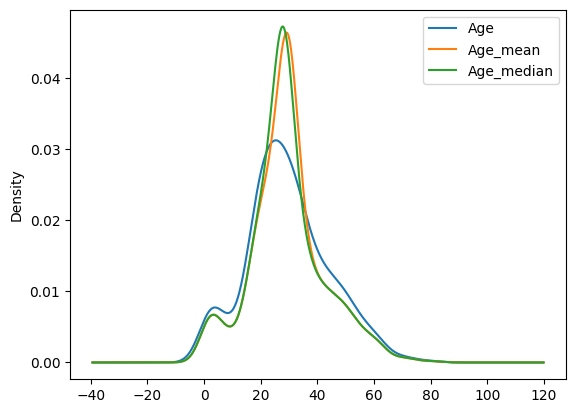

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

#variables imputed with mean
X_train['Age_mean'].plot(kind='kde', ax=ax)

#variables imputed with median
X_train['Age_median'].plot(kind='kde', ax=ax)

#adding legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

Change in distribution due to mean and median is a red flag

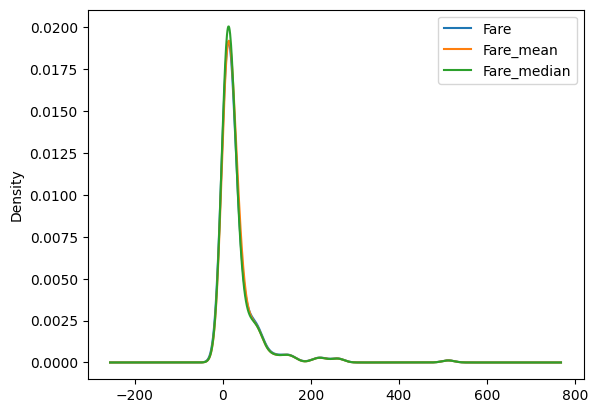

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

#variables imputed with mean
X_train['Fare_mean'].plot(kind='kde', ax=ax)

#variables imputed with median
X_train['Fare_median'].plot(kind='kde', ax=ax)

#adding legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [16]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [17]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


# Increase in outliers

<Axes: >

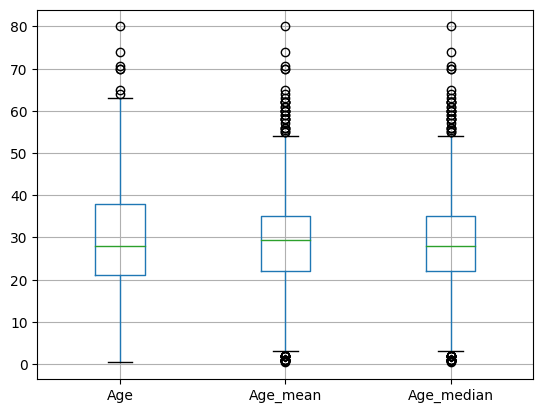

In [18]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

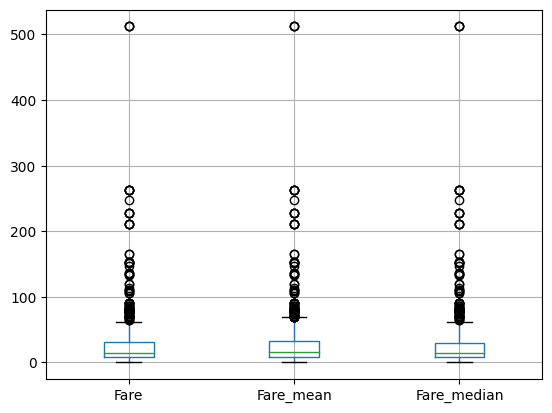

In [19]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using Scikit learn for imputation

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [21]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [22]:
trf = ColumnTransformer(
    [
        ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
    ], remainder='passthrough'
)

In [23]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [24]:
trf.named_transformers_['imputer1'].statistics_


array([29.])

In [25]:
trf.named_transformers_['imputer2'].statistics_


array([33.32546498])

In [26]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [27]:
X_train

array([[29.        , 56.4958    ,  0.        ],
       [32.        , 56.4958    ,  0.        ],
       [36.        , 33.32546498,  3.        ],
       ...,
       [29.        , 15.2458    ,  2.        ],
       [22.        ,  7.25      ,  0.        ],
       [21.        ,  8.6625    ,  0.        ]])

In [28]:
imputed_X_train=pd.DataFrame(X_train, columns=['Age', 'Fare', 'Family'])


In [29]:
imputed_X_train

,Age,Fare,Family
0,29.0,56.495800,0.0
1,32.0,56.495800,0.0
2,36.0,33.325465,3.0
3,36.0,7.895800,0.0
4,29.0,24.150000,1.0
...,...,...,...
707,29.0,0.000000,0.0
708,31.0,37.004200,2.0
709,29.0,15.245800,2.0
710,22.0,7.250000,0.0
